<a href="https://colab.research.google.com/github/Shanks1228/My_First_MLmodel_Number_Reader/blob/master/Number_Reader_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

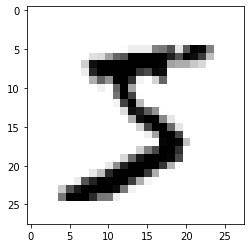

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
#print(x_train[0])

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [0]:
dense_layers = [0, 1, 2, 3]
layer_sizes = [32, 64, 128]

for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    NAME = "{}-dense-{}-nodes-{}".format(dense_layer, layer_size, int(time.time()))
    tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))
    print(NAME)
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Flatten())
    for d in range(dense_layer):
      model.add(tf.keras.layers.Dense(layer_size,activation = tf.nn.relu))
    model.add(tf.keras.layers.Dense(layer_size,activation = tf.nn.softmax))
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, epochs = 20,validation_split = 0.1,callbacks = [tensorboard])

In [0]:
NAME = "3-denselayers-128-nodes-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))
print(NAME)

model = tf.keras.models.Sequential()
   
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 20,validation_split = 0.1,callbacks = [tensorboard])

In [0]:
%load_ext tensorboard
%tensorboard --logdir  logs

In [0]:
%tensorboard --logdir  logs

In [23]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.1602 - acc: 0.9737
0.16015934057909104 0.9737


In [0]:
model.save('number_reader.model')

In [0]:
new_model = tf.keras.models.load_model('number_reader.model')

In [0]:
predictions = new_model.predict(x_test)

In [0]:
import numpy as np

In [21]:
print(np.argmax((predictions[1000])))

9


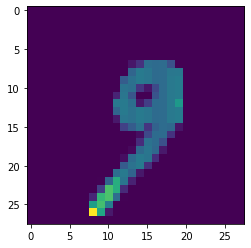

In [22]:
plt.imshow(x_test[1000])
plt.show()